##                      FACIAL EMOTION RECOGNITION USING DEEP LEARNING

## TRAINING

## Import Required Packages

In [1]:
import cv2
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator


## Initialize Image Data Generator with Rescaling

In [2]:
train_data_gen = ImageDataGenerator(rescale=1./255)
validation_data_gen = ImageDataGenerator(rescale=1./255)

## Train Dataset Details

In [3]:
import os
data="Emotion Dataset\\train"
i=1
l=[]
for category in os.listdir(data):
    if os.path.isdir(os.path.join(data,category)):
        l.append(category)
        print(i,'. ',category,sep='')
        i+=1

1. angry
2. disgust
3. fear
4. happy
5. neutral
6. sad
7. surprise


## Preprocess all Train Images

In [4]:
train_generator = train_data_gen.flow_from_directory(
        "Emotion Dataset\\train",
        target_size=(48, 48),
        batch_size=64,                 # 449 batches
        color_mode="grayscale",
        class_mode='categorical',      # [0,0,0,1,0,0,0]
        shuffle=False)


Found 28709 images belonging to 7 classes.


## Sample Images in Train Dataset

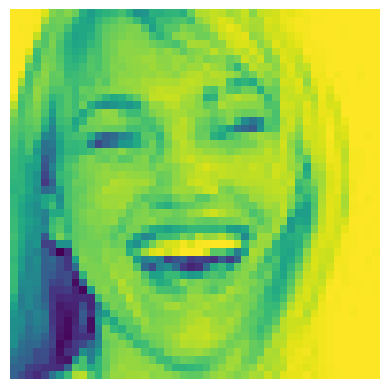

Output Labels : [0. 0. 0. 1. 0. 0. 0.] 

Output : happy


In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Get the next image batch (in this case, just one image)
images, labels = train_generator[234]      # 449 batches

# Access the image and its corresponding label
image = images[49]      # 64 images
label = labels[49]      # 64 labels
 
# 449 * 64 = 28736

# Display the random image from dataset
plt.imshow(image)
plt.axis('off')
plt.show()
print('Output Labels :',label,"\n")
print('Output :',l[np.where(label==1)[0][0]])


## Test Dataset Details

In [6]:
import os
data="Emotion Dataset\\test"
i=1
for category in os.listdir(data):
    if os.path.isdir(os.path.join(data,category)):
        print(i,'. ',category,sep='')
        i+=1

1. angry
2. disgust
3. fear
4. happy
5. neutral
6. sad
7. surprise


## Preprocess all Test Images

In [7]:
validation_generator = validation_data_gen.flow_from_directory(
        "Emotion Dataset\\test",
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical',
        shuffle='False')


Found 7178 images belonging to 7 classes.


## Sample Images in Test Dataset

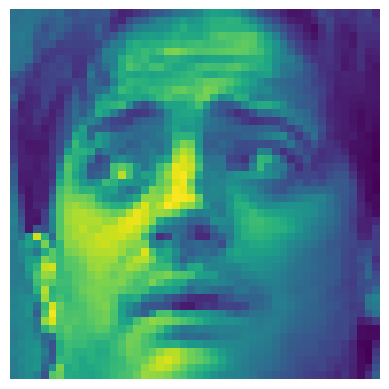

Output Labels : [0. 0. 1. 0. 0. 0. 0.] 

Output : fear


In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Get the next image batch (in this case, just one image)
images, labels = validation_generator[87]      # 113 batches

# Access the image and its corresponding label
image = images[49]      # 64 images
label = labels[49]      # 64 labels
 
# 113 * 64 = 7232

# Display the random image from dataset
plt.imshow(image)
plt.axis('off')
plt.show()
print('Output Labels :',label,"\n")
print('Output :',l[np.where(label==1)[0][0]])


## Create Model Structure

In [10]:
emotion_model = Sequential()

emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))

#cv2.ocl.setUseOpenCL(False)

emotion_model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001, decay=1e-6), metrics=['accuracy'])


C:\Users\UDAY\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\UDAY\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\optimizers\base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


## Train the Neural Network Model

In [11]:
emotion_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 46, 46, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 44, 44, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 20, 20, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │           7,175 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,345,607 (8.95 MB)

 Trainable params: 2,345,607 (8.95 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
emotion_model_info = emotion_model.fit(
        train_generator,
        steps_per_epoch=28709 // 64,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=7178 // 64)

C:\Users\UDAY\AppData\Roaming\Python\Python39\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 349s 777ms/step - accuracy: 0.2206 - loss: 1.8856 - val_accuracy: 0.2324 - val_loss: 1.8550
Epoch 2/50
  1/448 ━━━━━━━━━━━━━━━━━━━━ 58s 131ms/step - accuracy: 0.0000e+00 - loss: 1.9254

C:\Users\UDAY\AppData\Roaming\Python\Python39\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


448/448 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.0000e+00 - loss: 1.9254 - val_accuracy: 0.2123 - val_loss: 1.8560
Epoch 3/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 87s 195ms/step - accuracy: 0.2671 - loss: 1.8358 - val_accuracy: 0.2464 - val_loss: 1.8465
Epoch 4/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.1250 - loss: 1.7461 - val_accuracy: 0.2467 - val_loss: 1.8469
Epoch 5/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 244s 546ms/step - accuracy: 0.2564 - loss: 1.8099 - val_accuracy: 0.2573 - val_loss: 1.8001
Epoch 6/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.0312 - loss: 1.8355 - val_accuracy: 0.2578 - val_loss: 1.8000
Epoch 7/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 366s 819ms/step - accuracy: 0.2351 - loss: 1.7972 - val_accuracy: 0.2984 - val_loss: 1.7578
Epoch 8/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.0000e+00 - loss: 1.8056 - val_accuracy: 0.2974 - val_loss: 1.7572
Epoch 9/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 150s 334ms/step - accuracy: 0.2884 - loss: 1.7404 

## Save Model Structure in JSON File

In [25]:
import os
os.makedirs("models", exist_ok=True)

In [15]:
model_json = emotion_model.to_json()
with open("models/emotion_model.json", "w") as json_file:
    json_file.write(model_json)

## Save Trained Model Weight in .h5 File

In [17]:
emotion_model.save_weights('models/emotion_model.weights.h5')